In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Explore Data Using Pandas 

In [2]:
data = pd.read_csv('./Preprocessed_data.csv')
data.head(5)

/home/hadoop/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,description,origin,status,car_mileage,car_color,car_seats,gear,car_year,car_price,style,model,fuel,brand_name,region_name,url_image,website,month,year,num_null
0,🔹 HÀNG MỚI VỀ\n🔹 BMW 520i \n🔹 MODEL 2016\n🔹 Od...,Đức,Đã sử dụng,50000.0,Đen,4.0,Tự động,2015.0,1.170000e+09,Sedan,5 Series,Xăng,BMW,Hà Nội,https://cdn.chotot.com/namB6E0XkDPkf9h8KoahoRB...,chotot,11,2021,0
1,Bán nissan - Gran Livina nhập khẩu số tự động ...,Nhật Bản,Đã sử dụng,12000.0,Xám,3.0,Tự động,2009.0,2.342500e+08,Minivan (MPV),Grand livina,Xăng,Nissan,Hà Nội,https://cdn.chotot.com/50R_cYWFPAz0wHZqPAGaFr-...,chotot,11,2021,0
2,Auto88 về Mercedes C200 sx 2017 đky 2/2018 chạ...,Việt Nam,Đã sử dụng,30000.0,Xám,2.0,Tự động,2018.0,1.090000e+09,Sedan,C Class,Xăng,Mercedes Benz,Hà Nội,https://cdn.chotot.com/bhfeL3dPtccDnzlKzeAZ88X...,chotot,11,2021,0
3,xe còn đẹp gia đình đang xử dụng. Cần bán xe đ...,Nhật Bản,Đã sử dụng,120.0,Trắng,2.0,Tự động,2017.0,4.900000e+08,Hatchback,CX 3,Xăng,Mazda,An Giang,https://cdn.chotot.com/bZA5uIvzseB-MBKCPcDKe4K...,chotot,11,2021,0
4,"Xe gia đình đi, còn khá mới vì do công việc nê...",Việt Nam,Đã sử dụng,53000.0,Đen,2.0,Tự động,2016.0,4.000000e+08,Sedan,Cruze,Xăng,Chevrolet,Tp Hồ Chí Minh,https://cdn.chotot.com/c7q5pfENmvTLnzxYQ7MA70P...,chotot,11,2021,0


In [3]:
# Drop some column unused to visualize
data.drop(['url_image'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65135 entries, 0 to 65134
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  65135 non-null  object 
 1   origin       65135 non-null  object 
 2   status       65135 non-null  object 
 3   car_mileage  65135 non-null  float64
 4   car_color    65135 non-null  object 
 5   car_seats    65135 non-null  object 
 6   gear         65135 non-null  object 
 7   car_year     65135 non-null  object 
 8   car_price    65135 non-null  float64
 9   style        65135 non-null  object 
 10  model        65135 non-null  object 
 11  fuel         65135 non-null  object 
 12  brand_name   65135 non-null  object 
 13  region_name  65135 non-null  object 
 14  website      65135 non-null  object 
 15  month        65135 non-null  int64  
 16  year         65135 non-null  int64  
 17  num_null     65135 non-null  int64  
dtypes: float64(2), int64(3), object(13)
memory usa

In [4]:
data['car_seats'].replace('Unknown','0.0', inplace=True)

In [5]:
data['car_seats'] = data['car_seats'].astype('float64')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65135 entries, 0 to 65134
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  65135 non-null  object 
 1   origin       65135 non-null  object 
 2   status       65135 non-null  object 
 3   car_mileage  65135 non-null  float64
 4   car_color    65135 non-null  object 
 5   car_seats    65135 non-null  float64
 6   gear         65135 non-null  object 
 7   car_year     65135 non-null  object 
 8   car_price    65135 non-null  float64
 9   style        65135 non-null  object 
 10  model        65135 non-null  object 
 11  fuel         65135 non-null  object 
 12  brand_name   65135 non-null  object 
 13  region_name  65135 non-null  object 
 14  website      65135 non-null  object 
 15  month        65135 non-null  int64  
 16  year         65135 non-null  int64  
 17  num_null     65135 non-null  int64  
dtypes: float64(3), int64(3), object(12)
memory usa

In [7]:
data.drop(['num_null'], axis=1, inplace=True)
data.describe()

,car_mileage,car_seats,car_price,month,year
count,6.513500e+04,65135.000000,6.513500e+04,65135.000000,65135.000000
mean,1.406672e+05,4.533676,8.903779e+08,10.725248,2020.994703
std,1.693651e+07,2.510566,1.734558e+09,1.364346,0.076700
min,0.000000e+00,0.000000,1.100000e+07,1.000000,2019.000000
25%,0.000000e+00,2.000000,3.250000e+08,10.000000,2021.000000
50%,1.000000e+04,5.000000,5.270000e+08,11.000000,2021.000000
75%,6.000000e+04,5.000000,8.390000e+08,12.000000,2021.000000
max,4.294967e+09,47.000000,6.800000e+10,12.000000,2021.000000


In [8]:
data.describe()

,car_mileage,car_seats,car_price,month,year
count,6.513500e+04,65135.000000,6.513500e+04,65135.000000,65135.000000
mean,1.406672e+05,4.533676,8.903779e+08,10.725248,2020.994703
std,1.693651e+07,2.510566,1.734558e+09,1.364346,0.076700
min,0.000000e+00,0.000000,1.100000e+07,1.000000,2019.000000
25%,0.000000e+00,2.000000,3.250000e+08,10.000000,2021.000000
50%,1.000000e+04,5.000000,5.270000e+08,11.000000,2021.000000
75%,6.000000e+04,5.000000,8.390000e+08,12.000000,2021.000000
max,4.294967e+09,47.000000,6.800000e+10,12.000000,2021.000000


/home/hadoop/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='car_price'>

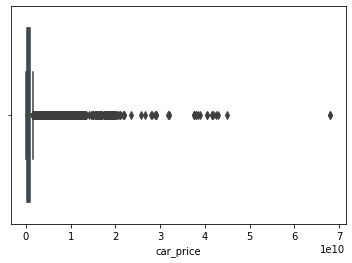

In [9]:
sns.boxplot(data['car_price'])

<AxesSubplot:>

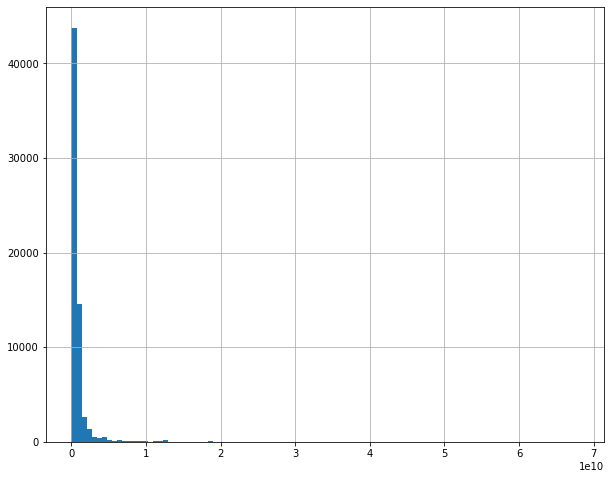

In [10]:
matplotlib.rcParams['figure.figsize'] = 10, 8
#car_price = data[data['car_price'] <= 2e10]
data['car_price'].hist(bins=100, grid=True)

In [11]:
data.head(2)

,description,origin,status,car_mileage,car_color,car_seats,gear,car_year,car_price,style,model,fuel,brand_name,region_name,website,month,year
0,🔹 HÀNG MỚI VỀ\n🔹 BMW 520i \n🔹 MODEL 2016\n🔹 Od...,Đức,Đã sử dụng,50000.0,Đen,4.0,Tự động,2015.0,1.170000e+09,Sedan,5 Series,Xăng,BMW,Hà Nội,chotot,11,2021
1,Bán nissan - Gran Livina nhập khẩu số tự động ...,Nhật Bản,Đã sử dụng,12000.0,Xám,3.0,Tự động,2009.0,2.342500e+08,Minivan (MPV),Grand livina,Xăng,Nissan,Hà Nội,chotot,11,2021


<AxesSubplot:>

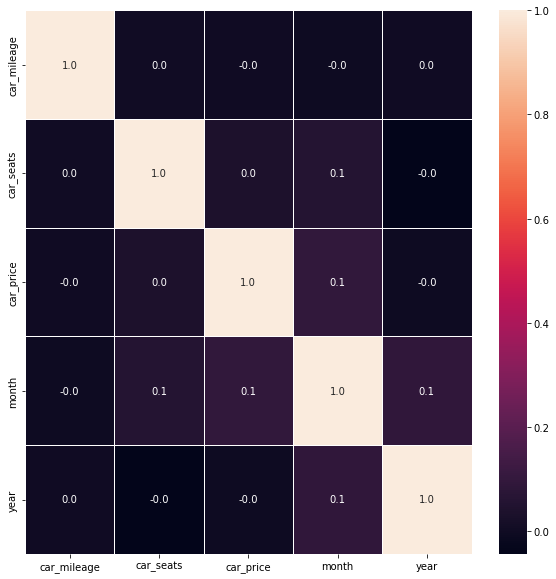

In [12]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

In [13]:
price_brand = data[['brand_name', 'car_price']].groupby(['brand_name']).mean()
price_brand.head(5)

,car_price
brand_name,
Acura,5.699477e+08
Alfa Romeo,7.352778e+08
Asia,1.676000e+08
Aston Martin,1.624500e+09
Audi,1.301657e+09


In [14]:
price_brand.reset_index(inplace=True)
price_brand.head(3)

,brand_name,car_price
0,Acura,5.699477e+08
1,Alfa Romeo,7.352778e+08
2,Asia,1.676000e+08


In [15]:
price_brand.sort_values('car_price', inplace=True)
price_brand.head(5)

,brand_name,car_price
78,Saturn,55000000.0
44,Lada,56000000.0
9,Buick,57500000.0
41,KIA,64000000.0
89,Vinaxuki,66000000.0


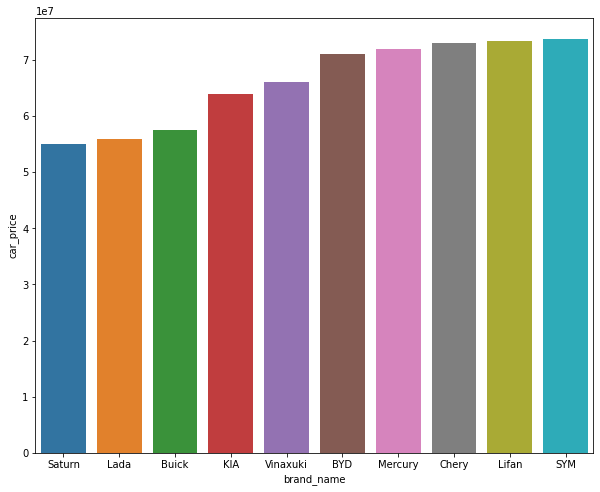

In [16]:
ax = sns.barplot(x='brand_name', y='car_price', data=price_brand.iloc[0:10])

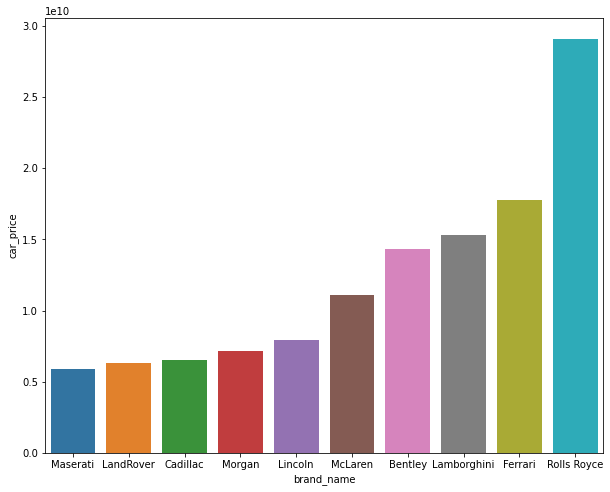

In [17]:
ax = sns.barplot(x='brand_name', y='car_price', data=price_brand[-10:])

<AxesSubplot:ylabel='car_price'>

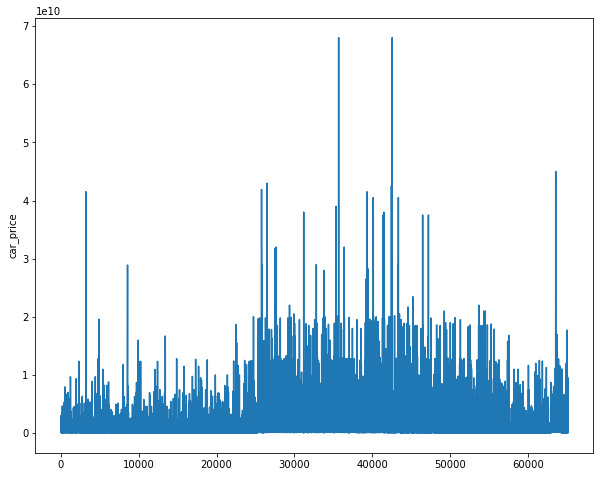

In [18]:
sns.lineplot(data=data['car_price'])

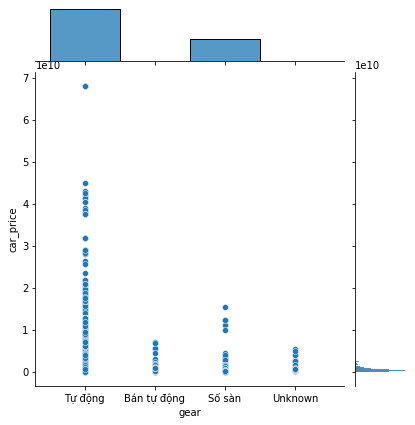

In [19]:
sns.jointplot(x='gear', y='car_price', data=data)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65135 entries, 0 to 65134
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  65135 non-null  object 
 1   origin       65135 non-null  object 
 2   status       65135 non-null  object 
 3   car_mileage  65135 non-null  float64
 4   car_color    65135 non-null  object 
 5   car_seats    65135 non-null  float64
 6   gear         65135 non-null  object 
 7   car_year     65135 non-null  object 
 8   car_price    65135 non-null  float64
 9   style        65135 non-null  object 
 10  model        65135 non-null  object 
 11  fuel         65135 non-null  object 
 12  brand_name   65135 non-null  object 
 13  region_name  65135 non-null  object 
 14  website      65135 non-null  object 
 15  month        65135 non-null  int64  
 16  year         65135 non-null  int64  
dtypes: float64(3), int64(2), object(12)
memory usage: 8.4+ MB


<AxesSubplot:xlabel='index'>

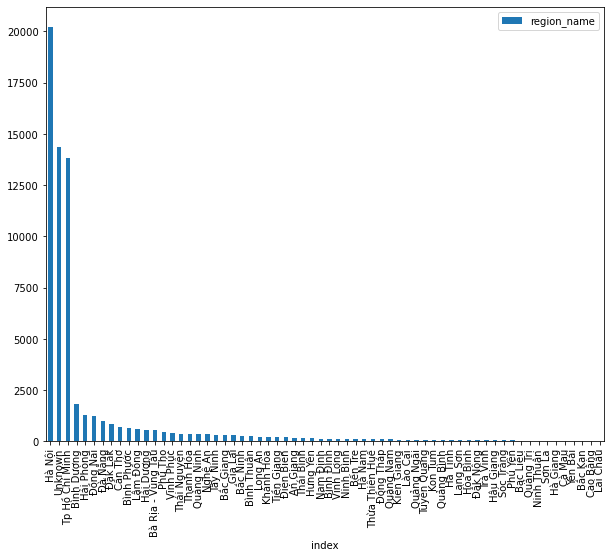

In [21]:
region = data.region_name.value_counts().reset_index()
region.plot.bar(x='index', y='region_name')

<AxesSubplot:xlabel='index'>

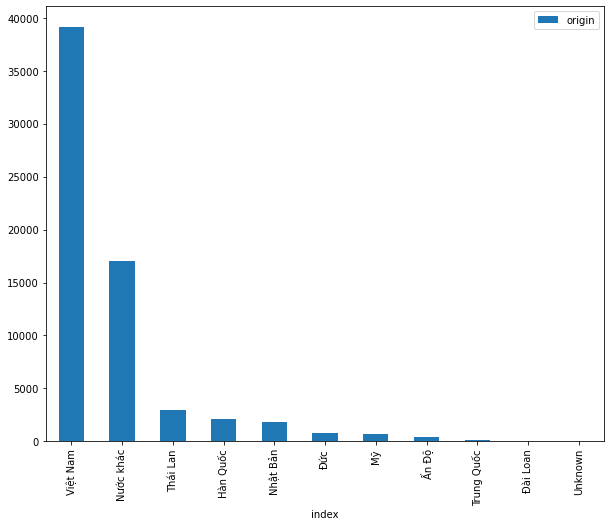

In [22]:
region = data.origin.value_counts().reset_index()
region.plot.bar(x='index', y='origin')

<AxesSubplot:xlabel='car_seats', ylabel='car_price'>

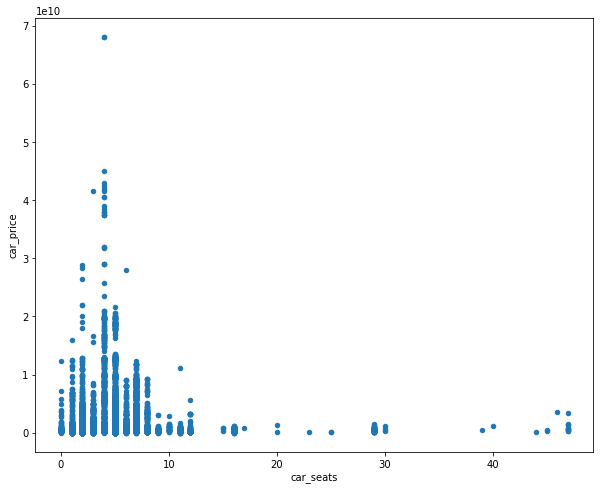

In [23]:
data.plot(kind='scatter', x='car_seats', y='car_price')

In [24]:
price_region = data[['brand_name', 'model', 'region_name', 'car_price']].groupby(['brand_name', 'model'])

In [25]:
test = data[['brand_name', 'model', 'region_name', 'car_price']]

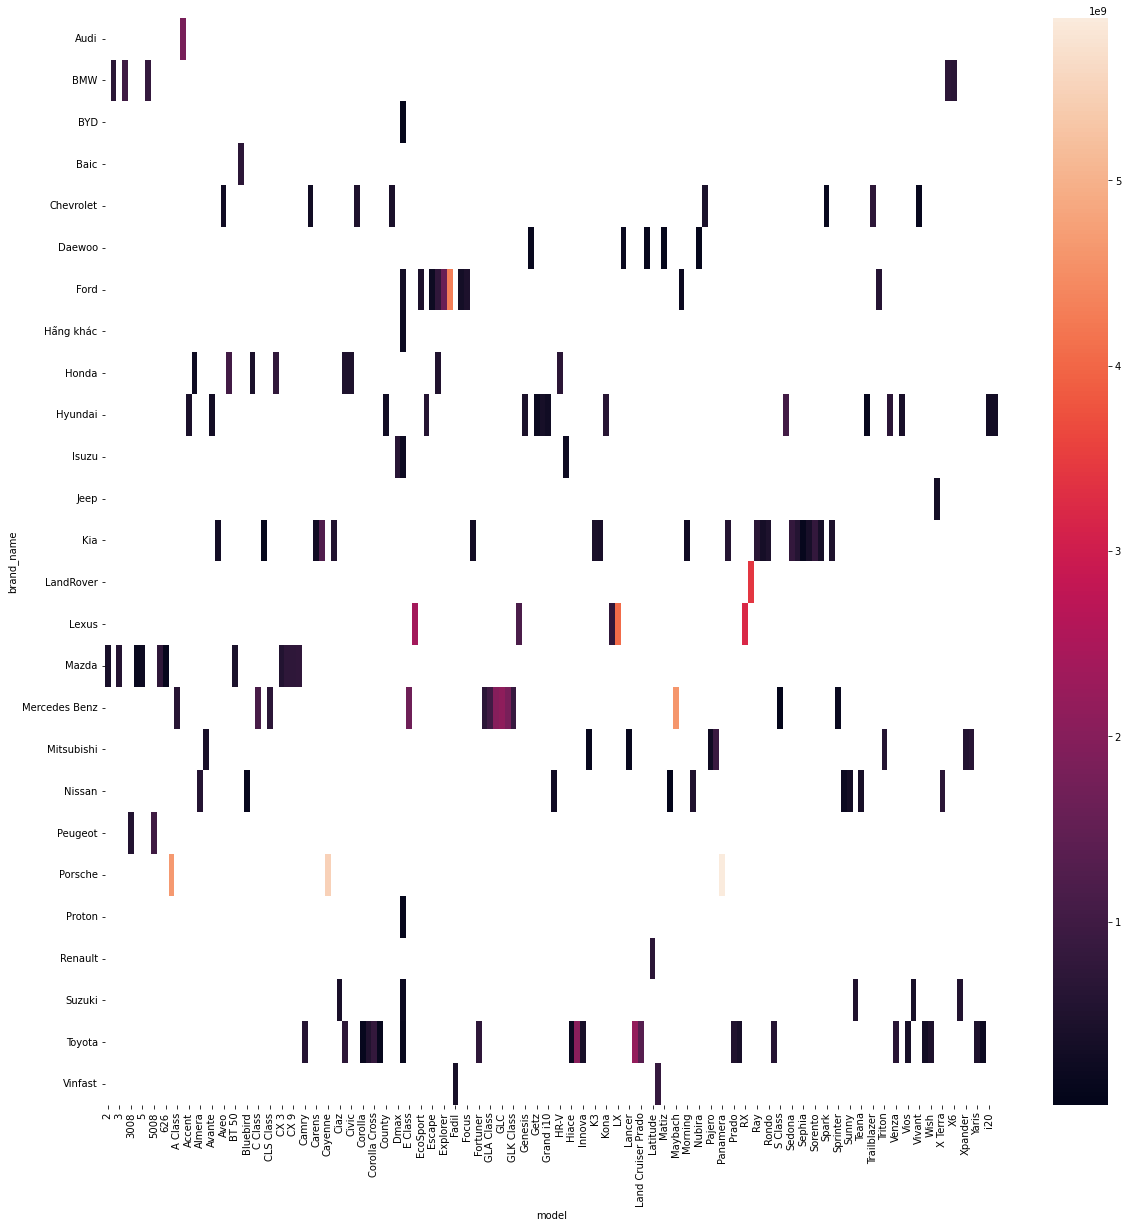

In [26]:
df_test = test.iloc[0:1000].pivot_table(values='car_price', index='brand_name', columns='model')
plt.rcParams['figure.figsize'] = 20, 20
sns.heatmap(df_test, annot=False)
plt.show()

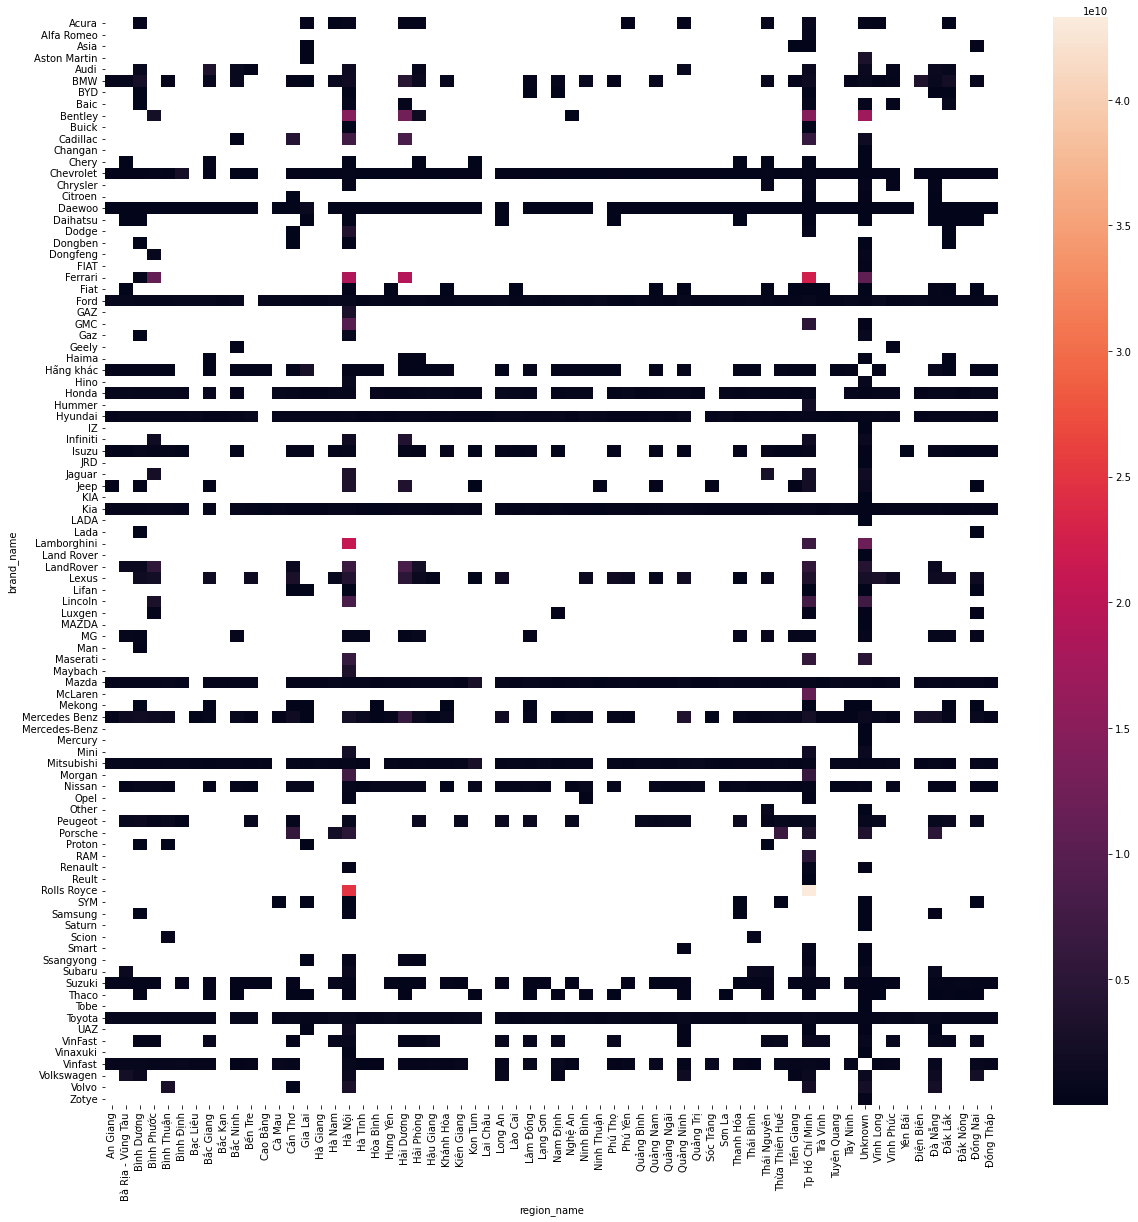

In [27]:
df_test = test.pivot_table(values='car_price', index='brand_name', columns='region_name')
plt.rcParams['figure.figsize'] = 20, 20
sns.heatmap(df_test, annot=False)
plt.show()

<AxesSubplot:>

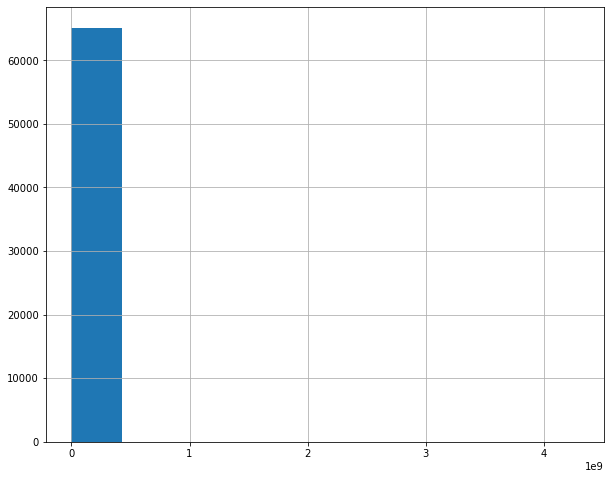

In [28]:
matplotlib.rcParams['figure.figsize'] = 10, 8
#car_price = data[data['car_price'] <= 2e10]
data['car_mileage'].hist(bins=10, grid=True)

In [29]:
chi_square_test = pd.crosstab(data.car_seats, data.model, margins=True)
print(chi_square_test)

model      1 Series  100NX  107  1200B  1240T  1490T  1500  159  190    2  \
car_seats                                                                   
0.0               0      0    0      0      0      0     0    0    0    0   
1.0               1      0    1      0      0      0     0    0    0    3   
2.0               2      1    0      1      2      0     0    0    3  167   
3.0               0      0    0      1      2      1     0    0    0    0   
4.0               1      0    0      0      0      0     0    0    0    0   
5.0               3      0    2      0      0      0     2    1    0  216   
6.0               0      0    0      0      0      0     0    0    0    0   
7.0               0      0    0      0      0      0     0    0    0    0   
8.0               0      0    0      0      0      0     0    0    0    0   
9.0               0      0    0      0      0      0     0    0    0    0   
10.0              0      0    0      0      0      0     0    0    0    0   

In [30]:
chi_square_test.iloc[0][0:708].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 7, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
from scipy.stats import chi2_contingency
import numpy as np

value = np.array(chi_square_test)
value.shape

(28, 709)

### (statistical value, p-value approximately zero, the degree of freedom).
#### p-value less than 0.05 => reject NULL HYPOTHESIS and we fail to accept that there is no association between the variables 

In [32]:
print(chi2_contingency(value)[0:3])

(490521.8966522864, 0.0, 19116)


<AxesSubplot:>

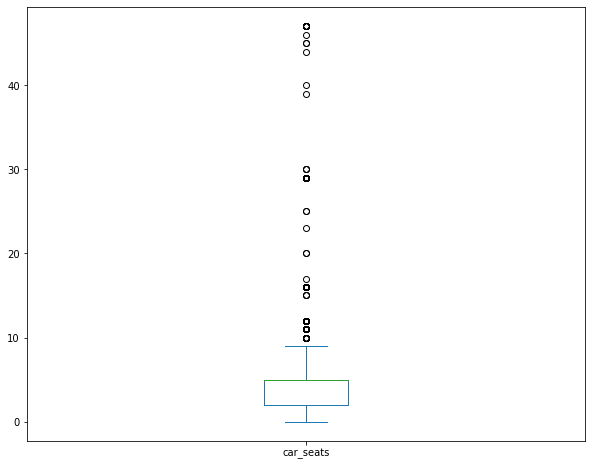

In [33]:
car_seats = data.car_seats.value_counts()
data['car_seats'].plot(kind='box')

In [34]:
len(data[data['car_seats'] > 20]) 

139

# Chi square hypothesis test two categorical variables

In [38]:
data['style']

0                Sedan
1        Minivan (MPV)
2                Sedan
3            Hatchback
4                Sedan
             ...      
65130            Sedan
65131        Hatchback
65132              Van
65133            Sedan
65134            Sedan
Name: style, Length: 65135, dtype: object

In [39]:
chi_square_test = pd.crosstab(data.car_seats, data['style'], margins=True)
chi_square_test

style,Coupe (2 cửa),Hatchback,Kiểu dáng khác,Minivan (MPV),Mui trần,Pick-up (bán tải),SUV / Cross over,Sedan,Unknown,Van,All
car_seats,,,,,,,,,,,
0.0,2,4,10,0,0,0,24,23,8,4,75
1.0,45,39,49,2,11,16,28,480,2,5,677
2.0,53,2848,411,281,7,1555,3067,8721,4,494,17441
3.0,2,31,990,965,0,5,3456,71,1,155,5676
4.0,126,32,125,3,0,1,242,161,0,26,716
5.0,57,5112,132,6,6,2492,5521,14090,2,107,27525
6.0,0,14,30,1066,0,0,512,39,0,131,1792
7.0,1,3,14,33,0,2,6162,3,0,594,6812
8.0,1,0,5,5,0,0,3198,0,0,70,3279


In [40]:
value = np.array(chi_square_test)
print(chi2_contingency(value, correction=False))

(84301.67019620337, 0.0, 270, array([[3.33921855e-01, 9.31296538e+00, 2.13249405e+00, 2.83603285e+00,
        2.76349121e-02, 4.70714670e+00, 2.56187150e+01, 2.71892991e+01,
        2.07261841e-02, 2.82106394e+00, 7.50000000e+01],
       [3.01420127e+00, 8.40650342e+01, 1.92493130e+01, 2.55999232e+01,
        2.49451140e-01, 4.24898442e+01, 2.31251601e+02, 2.45428740e+02,
        1.87088355e-01, 2.54648039e+01, 6.77000000e+02],
       [7.76524142e+01, 2.16569906e+03, 4.95904383e+02, 6.59509987e+02,
        6.42640669e+00, 1.09463127e+03, 5.95754677e+03, 6.32278089e+03,
        4.81980502e+00, 6.56029017e+02, 1.74410000e+04],
       [2.52712060e+01, 7.04805220e+02, 1.61387150e+02, 2.14630966e+02,
        2.09141015e+00, 3.56236862e+02, 1.93882435e+03, 2.05768616e+03,
        1.56855761e+00, 2.13498119e+02, 5.67600000e+03],
       [3.18784064e+00, 8.89077762e+01, 2.03582099e+01, 2.70746603e+01,
        2.63821294e-01, 4.49375605e+01, 2.44573332e+02, 2.59567176e+02,
        1.97865971e-01

# Style - Model

In [41]:
chi_square_test = pd.crosstab(data['model'], data['style'], margins=True)
chi_square_test

style,Coupe (2 cửa),Hatchback,Kiểu dáng khác,Minivan (MPV),Mui trần,Pick-up (bán tải),SUV / Cross over,Sedan,Unknown,Van,All
model,,,,,,,,,,,
1 Series,2,5,0,0,0,0,0,1,0,0,8
100NX,0,0,0,0,0,1,0,0,0,0,1
107,0,3,0,0,0,0,0,0,0,0,3
1200B,0,0,2,0,0,0,0,0,0,0,2
1240T,0,0,4,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
Zs,0,0,0,0,0,0,196,0,0,0,196
i20,0,35,0,0,0,0,20,1,0,0,56
i3,0,0,0,0,0,0,0,2,0,0,2


In [42]:
value = np.array(chi_square_test)
print(chi2_contingency(value, correction=False))

(347388.93827383866, 0.0, 7080, array([[3.56183312e-02, 9.93382974e-01, 2.27466032e-01, ...,
        2.21079297e-03, 3.00913487e-01, 8.00000000e+00],
       [4.45229139e-03, 1.24172872e-01, 2.84332540e-02, ...,
        2.76349121e-04, 3.76141859e-02, 1.00000000e+00],
       [1.33568742e-02, 3.72518615e-01, 8.52997620e-02, ...,
        8.29047363e-04, 1.12842558e-01, 3.00000000e+00],
       ...,
       [8.90458279e-03, 2.48345743e-01, 5.68665080e-02, ...,
        5.52698242e-04, 7.52283718e-02, 2.00000000e+00],
       [9.34981193e-02, 2.60763031e+00, 5.97098334e-01, ...,
        5.80333154e-03, 7.89897904e-01, 2.10000000e+01],
       [2.90000000e+02, 8.08800000e+03, 1.85200000e+03, ...,
        1.80000000e+01, 2.45000000e+03, 6.51350000e+04]]))


# gear - fuel

In [50]:
chi_square_test = pd.crosstab(data['gear'], data['fuel'], margins=True)
chi_square_test

fuel,Dầu,Unknown,Xăng,Động cơ Hybrid,All
gear,,,,,
Bán tự động,76,0,234,2,312
Số sàn,4702,4,14892,6,19604
Tự động,6119,8,38793,271,45191
Unknown,5,0,22,1,28
All,10902,12,53941,280,65135


In [51]:
value = np.array(chi_square_test)
print(chi2_contingency(value, correction=False))

(1175.4009844695302, 2.829931555264351e-240, 16, array([[5.22211407e+01, 5.74806172e-02, 2.58380164e+02, 1.34121440e+00,
        3.12000000e+02],
       [3.28122834e+03, 3.61169878e+00, 1.62348870e+04, 8.42729715e+01,
        1.96040000e+04],
       [7.56386401e+03, 8.32566209e+00, 3.74245449e+04, 1.94265449e+02,
        4.51910000e+04],
       [4.68651263e+00, 5.15851693e-03, 2.31879635e+01, 1.20365395e-01,
        2.80000000e+01],
       [1.09020000e+04, 1.20000000e+01, 5.39410000e+04, 2.80000000e+02,
        6.51350000e+04]]))


# Status - gear

In [52]:
chi_square_test = pd.crosstab(data['gear'], data['status'], margins=True)
chi_square_test

status,Mới,Đã sử dụng,All
gear,,,
Bán tự động,128,184,312
Số sàn,1751,17853,19604
Tự động,14311,30880,45191
Unknown,6,22,28
All,16196,48939,65135


In [53]:
value = np.array(chi_square_test)
print(chi2_contingency(value, correction=False))


(3827.091653093064, 0.0, 8, array([[7.75796730e+01, 2.34420327e+02, 3.12000000e+02],
       [4.87458945e+03, 1.47294105e+04, 1.96040000e+04],
       [1.12368686e+04, 3.39541314e+04, 4.51910000e+04],
       [6.96227834e+00, 2.10377217e+01, 2.80000000e+01],
       [1.61960000e+04, 4.89390000e+04, 6.51350000e+04]]))
